<img style="float: right;" src="./img/ODW_banner_devpost.jpg"></img>

<hr>

<a href="./ecmwf_web_mapping_service.ipynb"><< 02-ECMWF Web Mapping Service</a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./ecmwf_copernicus_climate_change_service.ipynb">04-Copernicus Climate Change Service (C3S) >></a>

## <center><h2>3. ECMWF Web Coverage Service (WCS)</h2></center>

- [3.1 Service Description](#service-description) 
- [3.2 Available datasets](#datasets) 
- [3.3 How to access the service](#service-example)

NOTE: this service is not an official ECMWF data service and will be available for testing purposes only until April 2018.

<hr>

## <a id='service-description'></a>3.1 Service Description

A **Web Coverage Service (WCS)** is defined by the Open Geospatial Consortium (OGC) (2012) as:

> *The OGC WCS supports **electronic retrieval of geospatial data** as 'coverages' - that is, digital geospatial information representing space/time-varying phenomena.*

Therefore, WCS is a standard data-access protocol that defines and enables the web-based retrieval of multi-dimensional geospatial datasets. It provided access to the full range of geospatial data served from a web-server and allows for requesting only a subset of the data. A WCS support and trim operations, where either the data dimension (slice) or the data extent (trim) is reduced.

Unlike Web Mapping Service (WMS), another widely-used OGC standard for geospatial datasets, which returns spatial data as an image or 'static map', WCS returns data in its raw form, which it's original semantics. This allows for further data processing and analysis or the building of web applications while at the same time the data volume transferred is minimised.

WCS is a **machine-to-machine interface** and therefore aimed at technical data users or developers, rather than at end users.

ECMWF is climate data service provider as part of the [H2020 EarthServer-2]('http://earthserver.eu') project and will eventually offer access to 1 PB of global climate reanalysis data.

[This tutorial]('http://nbviewer.jupyter.org/github/earthserver-eu/OGC_WCS_tutorial/blob/master/index.ipynb') gives more information about web services and practical examples how a Web Coverage Service can be used.

<b>NOTE</b>  
ECMWF's web service is setup to demonstrate the potential of WC(P)S service and is not an operational service offered by ECMWF. The current OGC WCS server is not meant to be integrated into any operational application.

<hr>

## <a id='datasets'></a>3.2 Available datasets

We subsequently list the data sets currently available by ECMWF's Web Coverage Service. Available data sets are data we think could be of most interest. Since the WCS server is explorative, you might as well find other data sets offered and not explicitly mentioned in the table below.

Currently, around 478 GBs of meteorological and hydrological data from two projects are available:
- [the ERA-interim reanalysis project](#era-int)
- [the Global Flood Awareness System (GloFAS)](#glofas)


### <a id='era-int'></a>ERA-interim climate reanalysis

#### Surface level parameter

| Parameter | Coverage Id | Pressure level | Spatial resolution | Temporal resolution | Time period covered | Format |
|------------------------|----------------|------------------|-----------------|-----------------------|-------------|------------| 
|2 m air temperature|temp2m|Surface|Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|
|Sea surface temperature|SST|Surface|Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|
|Mean sea level pressure|mslp|Surface|Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|
|Volumetric soil moisture|soil_moisture|Surface|Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|

#### Accumulated forecast

| Parameter | Coverage Id | Pressure level | Spatial resolution | Temporal resolution | Time period covered | Format |
|------------------------|----------------|------------------|-----------------|-----------------------|-------------|----------|
|Total precipitation|precipitation|Surface| Global (0.5x0.5 deg)|6-hourly| 2 January 1979 - 31 December 2015|csv, xml,netcdf,png|

#### Pressure level (500 / 850 / 1000 hPa)

| Parameter | Coverage Id | Pressure level | Spatial resolution | Temporal resolution | Time period covered | Format |
|----------------------|----------------|------------------|-----------------|-----------------------|-------------|-------------|
|Geopotential height|pl_geopot|1000/850/500| Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|
|Temperature|pl_t2m|1000/850/500| Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|
|Relative humidity|pl_relhum|1000/850/500| Global (0.5x0.5 deg)|6-hourly|1 January 1979 - 31 December 2015|csv, xml, netcdf, png|

### <a id='glofas'></a>Global Flood Awareness System (GloFAS)

| Parameter | Coverage Id | Type | Spatial resolution | Temporal resolution | Time period covered | Format |
|------------------------|----------------|------------------|-----------------|-----------------------|-------------|-----------|
|River discharge forecast|river_discharge_forecast_opt2|Ensemble Forecast (51 ensemble members)| Global (0.1x0.1 deg)|daily|8 April 2008 |csv, xml, netcdf, png|
|Return level discharge|return_level2, return_level5, return_level20| Analysis | Global (0.1x0.1 deg)| |1 coverage per return level period|csv, xml, netcdf, png|
|ERA-interim discharge data|ERA_discharge|Reanalysis|Global (0.1x0.1 deg)|1 January 1981 - 31 December 1989|daily|csv, xml, netcdf, png|

<hr>

## <a id='service-example'></a>3.3 How to access the service?

- [WCS core requests](#wcs_core)
- [WCPS extension request](#wcps_extension)
- [WC(P)S examples in Python](#wcps_python)
- [WCPS examples in R](#wcps_r)

### <a id='wcs_core'></a> WCS core requests

The WCS core supports three main HTTP requests (operations), which are submitted in the form of a URL:
> the ** *GetCapabilities* ** request returns an XML document with information to the service and data provider and an overview of all the coverages (geospatial fields) available on the web server

>> Example: <a href="http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCapabilities" target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCapabilities</a>

> the ** *DescribeCoverage* ** request returns an XML document with metadata information of one specific coverage
>> Example: get information about 2m air temperature coverage  
<a href="http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=DescribeCoverage&coverageId=temp2m" target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=DescribeCoverage&coverageId=temp2m</a>

> the ** *GetCoverage* ** request returns a full coverage encoded in a specified format, e.g GeoTiff, XML or netCDF
>> Example: retrieve a 2D global field of 2m air temperature of 15 December 2013 in XML format  
<a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCoverage&coverageId=temp2m&subset=ansi("2013-12-15T00:00")&format=application/gml+xml' target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCoverage&coverageId=temp2m&subset=ansi("2013-12-15T00:00")&format=application/gml+xml</a>

### <a id='wcps_extension'></a>WCPS extension request 

A **Web Coverage Processing Service** is an extension supported by the WCS 2.0 core specification and can optionally be implemented by a WCS server. WCPS allows for crafting queries to be run on the data using a text based query language, similar to SQL.  
The extension specifies an additional WCS request:  
> the ***ProcessCoverages*** request returns a coverage encoded in a specified format (e.g. netCDF or csv) and allows for mathematical calculations on the requested coverages. 
>> Example: Convert a 2D global field of 2m air temperature from 31 December 2015 from K to degC  
<a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode (c[ansi("2015-12-31T00:00")] - 273.15,"csv")' target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode (c[ansi("2015-12-31T00:00")] - 273.15,"csv")</a>

### <a id='wcps_python'></a>WC(P)S examples in Python

- [OWSlib library - Using WCS from Python](#owslib)
- [From WCS to a Python list / numpy array](#wcs_numpy)

#### <a id='owslib'></a> OWSlib library - Using WCS from Python

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. An example of the use of the WebCoverageService class is given.

The libraray is available from GitHub @ https://github.com/earthserver-eu/OWSLib

##### Principal setup of OWSlib

In [4]:
# Let's create a WebCoverageService object
from owslib.wcs import WebCoverageService

ecmwf_wcs = WebCoverageService('http://earthserver.ecmwf.int/rasdaman/ows?', version='2.0.0')

for coverage_name in ecmwf_wcs.contents.keys():
    print coverage_name

http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&request=GetCapabilities&version=2.0.0
soil_moisture
T2m
return_level20
SST
ECMWF_SST_4326_05
temp2m
pl_t2m
TP
pl_geopot
return_level5
river_discharge_forecast_test6
river_discharge_forecast
return_level2
mslp
discharge_forecast
pl_relhum
precipitation
ERA_discharge
river_discharge_forecast_opt2


##### Accessing information about a single Coverage

In [7]:
# The contents parameter of the created WebCoverageService object gives us a list of available properties
for item in dir(ecmwf_wcs.contents['temp2m']):
    if "_" not in item:
        print item

abstract
axisDescriptions
boundingBox
boundingBoxWGS84
boundingboxes
crsOptions
defaulttimeposition
grid
id
keywords
styles
supportedCRS
supportedFormats
timelimits
timepositions
title


In [8]:
# Let's find out the boundingBox of the coverage 2m air temperature
ecmwf_wcs.contents['temp2m'].boundingboxes

http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&request=DescribeCoverage&version=2.0.0&CoverageID=temp2m


[{'bbox': (-90.25, -180.25, 90.25, 179.75),
  'nativeSrs': 'http://localhost:8080/def/crs-compound?1=http://localhost:8080/def/crs/EPSG/0/4326&2=http://localhost:8080/def/crs/OGC/0/AnsiDate'}]

In [12]:
# The grid property gives us information about the number of data points and available axes
for item in dir(ecmwf_wcs.contents['temp2m'].grid):
    if "_" not in item:
        print item + ": " + str(ecmwf_wcs.contents['temp2m'].grid.__dict__[item])

axislabels: ['Long', 'Lat', 'ansi']
dimension: 3
highlimits: ['719', '360', '54107']
lowlimits: ['0', '0', '0']
offsetvectors: [['0', '0.5', '0'], ['-0.5', '0', '0'], ['0', '0', '0.25']]
origin: ['90', '-180', '138062']


In [14]:
# See what data formats are supported
ecmwf_wcs.contents['temp2m'].supportedFormats

['application/netcdf',
 'image/jp2',
 'image/tiff',
 'application/gml+xml',
 'image/png']

In [16]:
# See available time stamps of a coverage with a time element
for time in ecmwf_wcs.contents['temp2m'].timepositions[0:16]:
    print time.isoformat()

1979-01-01T00:00:00
1979-01-01T06:00:00
1979-01-01T12:00:00
1979-01-01T18:00:00
1979-01-02T00:00:00
1979-01-02T06:00:00
1979-01-02T12:00:00
1979-01-02T18:00:00
1979-01-03T00:00:00
1979-01-03T06:00:00
1979-01-03T12:00:00
1979-01-03T18:00:00
1979-01-04T00:00:00
1979-01-04T06:00:00
1979-01-04T12:00:00
1979-01-04T18:00:00


In [40]:
from owslib.wms import WebMapService

wms = WebMapService('http://')

##### Build a GetCoverage request based on the collected coverage information

WCS 2.0.0 DEBUG: Second part of URL: format=application%2Fnetcdf&version=2.0.0&request=GetCoverage&service=WCS&CoverageID=temp2m&subset=Long%28-180%2C179.5%29&subset=Lat%28-90%2C90%29&subset=ansi%28%222003-08-01T12%3A00%22%2C%222003-08-01T18%3A00%22%29
http://earthserver2e.ecmwf.int:8080/rasdaman/ows


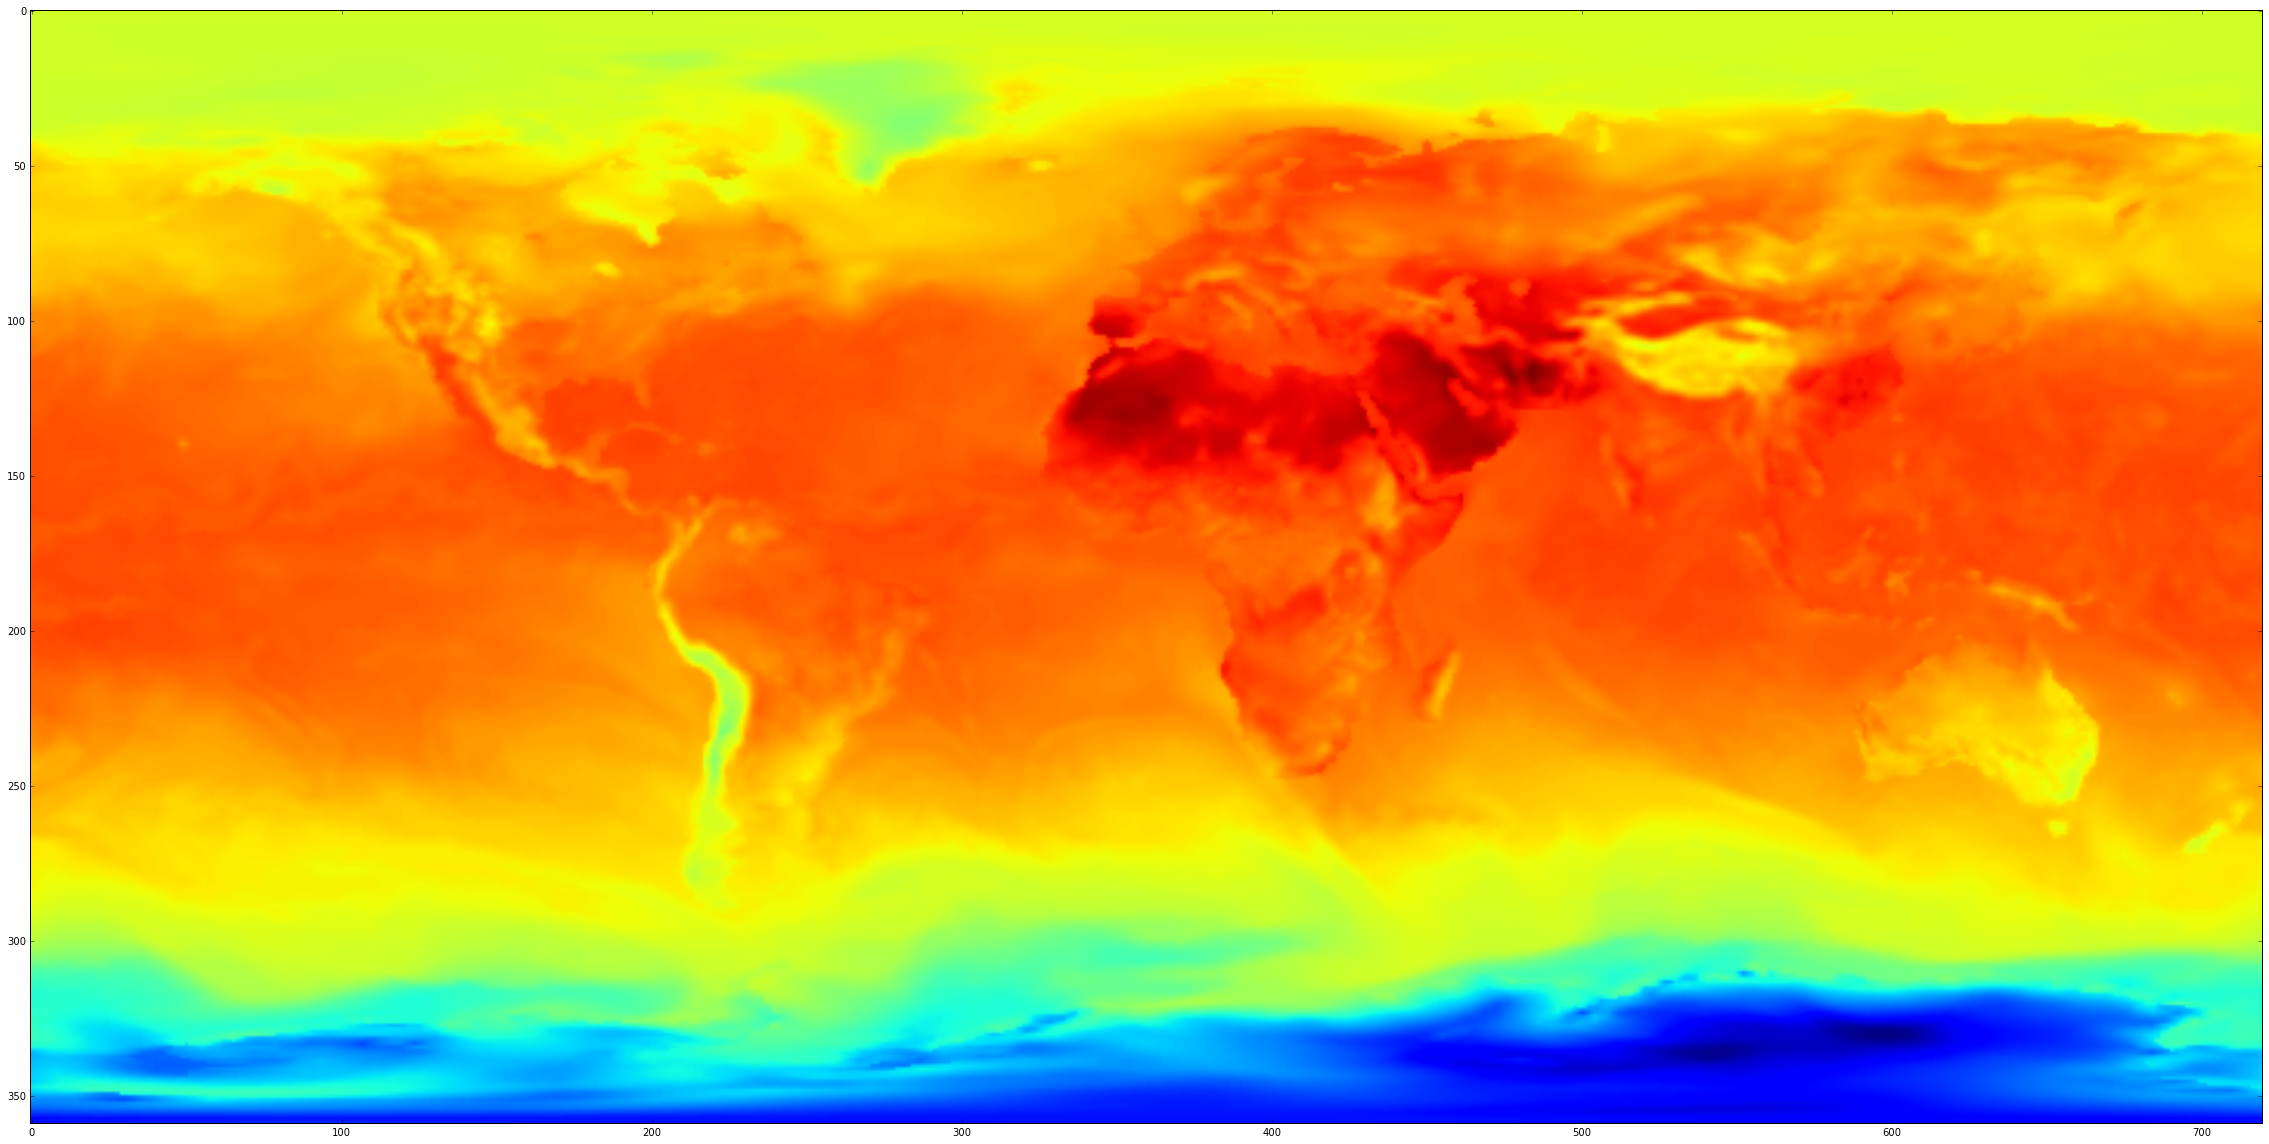

In [55]:
# Request a global 2m air temperature data field from 1 August 2003 at 12:00 UTC as netcdf.
# Store the file temporarily and load it for plotting of the data field

%matplotlib inline
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt

# GetCoverage request
coverage_file = ecmwf_wcs.getCoverage(identifier=['temp2m'], format='application/netcdf', 
                                      subsets=[('Long',-180,179.5),('Lat',-90,90),('ansi',"2003-08-01T12:00","2003-08-01T18:00")])

# Store the requested field as netCDF file
with open('testCoverage1.nc','w') as outfile:
    outfile.write(coverage_file.read())

# Open the stored netCDF file
ncdata = nc.Dataset("testCoverage1.nc","a",format="NETCDF4")

# Retrieve the data from the netCDF object
data = np.flipud(np.rot90(ncdata.variables['field_1'][:,:,0]))

# Plot the data
plt.figure(figsize=(40,20))
plt.imshow(data)

#### <a id='wcs_numpy'></a>From WCS to a python list / numpy array

Two examples are presented how WCPS requests can dynamically stored in a python list or numpy array without temporary data storage

##### Retrieve a time-series of global monthly averages of 2 m air temperature and store it as python list

WCS request of retrieving a time series of global monthly means. In the placeholders the parameter and the temporal limits of the time-series (in ISO-format, e.g. "2010-01-01T00:00") have to be specified. The query contains following processing steps: (1) Surface temperature values in Kelvin are converted to degree Celsius and (2) 6-hourly global time-series is averaged based on specified time-series limits. 

- **Access point**: http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1 
- **Request type**: &ProcessCoverages
- **WCPS query (example)**: &query=for c in (temp2m) return encode(avg(c[ansi("2001-01-01T00:00":"2001-01-31T18:00")] - 273.15), "csv")


In [56]:
url_fmt = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
          '&request=ProcessCoverages' \
          '&query=for c in (%s) return encode(avg(c[ansi("%s":"%s")] - 273.15), "csv")'

In [61]:
# Helper lists for handling datetime objects

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# A list for every first day in the month from Jan 1979 to Dec 2014
startDateList = (range(432))
x =datetime(1979,1,1,0)
for i in range(0,len(startDateList)):
    startDateList[i]=x
    x=(x.replace(day=1)+timedelta(days=31)).replace(day=1)

# A list with every last day of the month from Jan 1979 to Dec 2014
endDateList = (range(432))
for i in range(0, len(endDateList)):
    y = startDateList[i].replace(hour=18) + relativedelta(day=31)
    endDateList[i]=y

In [62]:
import requests
# Go through the helper lists and retrieve for every month the monthly global mean of 2m air temperature 
# and append a list of monthly global means.
monthlyAvgTS = []
for i,j in zip(startDateList,endDateList):
    url = url_fmt % ("temp2m", i.isoformat(),j.isoformat())
    r= requests.get(url,
                proxies={'http':None}
                )

    r.raise_for_status()
    y= [float(a) for a in r.text[1:-1].split(",")]
    monthlyAvgTS.append(y[0])

##### Retrieve global monthly average 2 m air temperature fields and store them into a multi-dimensional numpy array

WCS request of retrieving all global fields of one specific month and processing the monthly average of every grid-point on-the-fly. The query contains following processing steps: (1) Surface temperature values in Kelvin are converted to degree Celsius and (2) 6-hourly global surface temperature fields for one specific month are averaged.

- Access point: http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1
- Request type: &ProcessCoverages
- WCPS query:see below


In [66]:
url_fmt_field = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
    '&request=ProcessCoverages&' \
    'query=for c in (%s) return encode((condense + over $x x(imageCrsDomain(c[Lat(%d:%d), Long(%d:%d),ansi("%s":"%s")], ansi))'\
    'using c[ansi($x)]/%d)-273.15, "csv")'

In [67]:
# Create a raster stack of all monthly surface temperature averages

monthlyStackGlobal = np.empty((361,720,432))
k = 0
for i,j in zip(startDateList,endDateList):
    slices = j.day*4
    url = url_fmt_field % ("temp2m", -90,90,-180,179.5, i.isoformat(),j.isoformat(), slices)
    r= requests.get(url,
                proxies={'http':None}
                )

    r.raise_for_status()
    x = np.array(eval(r.text.replace('{','[').replace('}',']')))
    monthlyStackGlobal[:,:,k] = x.transpose()
    k = k+1


### <a id='wcs_r'></a> WCS examples in R

In [ ]:
# Install R packages, if not already installed
# install.packages(c("XML", "httr"), "~/miniconda3/lib/R/library")

# Load packages
library("XML")
library("httr")

# GetCapabilities request
requestGetCapabilities <- httr::GET(url = "http://earthserver.ecmwf.int/rasdaman/ows", 
                                    query = list(service = "WCS",
                                                 request = "GetCapabilities",
                                                 version = "2.0.0"))

# Convert response into a list
xmlResponse <- XML::xmlToList(httr::content(requestGetCapabilities, "text", encoding = "UTF-8"))

# Extract only layers info
allLayers <- xmlResponse[["Contents"]]

# Print available layers
layerNames <- c()
for (i in seq_along(allLayers)) {
  layerNames <- c(layerNames, allLayers[i]$CoverageSummary$CoverageId)
}
print(layerNames)

<hr>

&copy; 2017 ECMWF

This software is licensed under the terms of the Apache Licence Version 2.0 which can be obtained at http://www.apache.org/licenses/LICENSE-2.0. In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor
does it submit to any jurisdiction.